# import packages

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# data collection

In [2]:
import sqlite3

In [3]:
con = sqlite3.connect(r"C:\Users\mkhamechian\OneDrive - Laminaar Americas\Desktop\ML_projects\ML-NLP-password-strength-prediction\password_data.sqlite")

In [4]:
data = pd.read_sql_query("select * from Users", con)

In [5]:
data.shape

(100000, 3)

In [6]:
data.head(3)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1


# data cleaning

In [7]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [8]:
data.drop("index", axis=1, inplace=True)

In [9]:
data.columns

Index(['password', 'strength'], dtype='object')

In [10]:
data.isnull().sum()

password    0
strength    0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data.dtypes

password    object
strength     int64
dtype: object

In [13]:
data["strength"].unique()

array([1, 2, 0], dtype=int64)

# data analysis

    e.g ,,      
          
          a) How many password textual actually holds only numeric characters ?
          b) How many password textual actually holds only Upper-case character ? 
          
          c) How many password textual actually holds only alphabet ?
          d) How many password textual actually holds alpha-numeric character ? 
          e) How many password textual actually holds title-case character ? 
          
          f) How many password textual actually holds some special special character ? 
          

**how many passwords are just numbers?**

In [14]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [15]:
data["password"].str.isnumeric().sum()

26

In [16]:
data[data["password"].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


**how many passwords are just upper_case?**

In [20]:
data["password"].str.isupper().sum()

1506

**how many passwords are just alpha numeric?**

In [27]:
data["password"].str.isalnum().sum()

97203

**how many passwords are just title case character?**

In [29]:
data["password"].str.istitle().sum()

932

**how many passwords are holds special characters**

In [35]:
import string

In [37]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
def find_semantics(row):
    for ch in row:
        if ch in string.punctuation:
            return 1
        else:
            pass

In [44]:
data["password"].apply(find_semantics).sum()

2663.0

# feature engineering

In [51]:
# data["length"] = [len(password) for password in data["password"]]
data["length"] = data["password"].str.len()


In [52]:
data["length"] 

0         9
1        12
2         9
3        23
4         8
         ..
99995    10
99996    10
99997     9
99998     9
99999    11
Name: length, Length: 100000, dtype: int64

In [57]:
def fre_lowercase(row):
    return len([char for char in row if char.islower()])/ len(row)

In [58]:
def fre_uppercase(row):
    return len([char for char in row if char.isupper()])/ len(row)

In [59]:
def fre_digit(row):
    return len([char for char in row if char.isdigit()])/ len(row)

In [60]:
data["password"].apply(fre_lowercase)
    

0        0.333333
1        0.416667
2        0.777778
3        0.782609
4        0.625000
           ...   
99995    0.700000
99996    0.800000
99997    0.777778
99998    0.666667
99999    0.727273
Name: password, Length: 100000, dtype: float64

In [63]:
data["lower_freq"] = np.round(data["password"].apply(fre_lowercase), 3)
data["upper_freq"] = np.round(data["password"].apply(fre_uppercase), 3)
data["digit_freq"] = np.round(data["password"].apply(fre_digit), 3)

In [64]:
data.head()

,password,strength,length,lower_freq,upper_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222
3,accounts6000webhost.com,2,23,0.783,0.0,0.174
4,c443balg,1,8,0.625,0.0,0.375


In [71]:
def special_case(row):
    return sum([1 for char in row if char in string.punctuation])/ len(row)

In [72]:
data["special_freq"] = np.round(data["password"].apply(special_case), 3)

In [73]:
data.head()

,password,strength,length,lower_freq,upper_freq,digit_freq,special_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043
4,c443balg,1,8,0.625,0.0,0.375,0.000


**perform descriptive statistic on data with new features**

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   password      100000 non-null  object 
 1   strength      100000 non-null  int64  
 2   length        100000 non-null  int64  
 3   lower_freq    100000 non-null  float64
 4   upper_freq    100000 non-null  float64
 5   digit_freq    100000 non-null  float64
 6   special_freq  100000 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 5.3+ MB


In [76]:
data.describe()

,strength,length,lower_freq,upper_freq,digit_freq,special_freq
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.988730,9.986700,0.615026,0.053537,0.327797,0.003413
std,0.510926,2.887813,0.220644,0.153889,0.198814,0.026157
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,8.000000,0.500000,0.000000,0.188000,0.000000
50%,1.000000,9.000000,0.667000,0.000000,0.300000,0.000000
75%,1.000000,11.000000,0.778000,0.000000,0.400000,0.000000
max,2.000000,220.000000,1.000000,1.000000,1.000000,1.000000


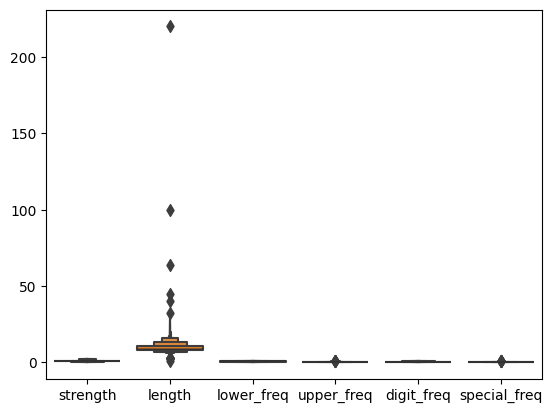

In [81]:
sns.boxenplot(data = data)
plt.show()

**feature importance**

In [82]:
data.columns

Index(['password', 'strength', 'length', 'lower_freq', 'upper_freq',
       'digit_freq', 'special_freq'],
      dtype='object')

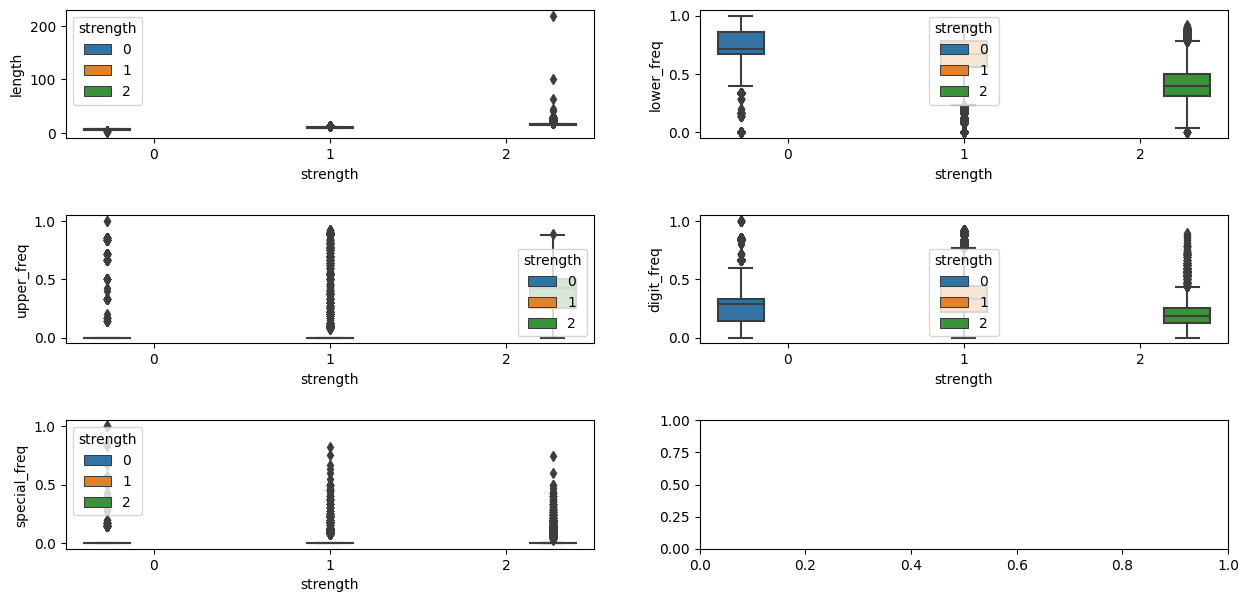

In [83]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5 , ax6)) = plt.subplots(3 , 2 , figsize=(15,7))

sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='lower_freq' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='upper_freq' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='special_freq' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

#  Feature Importance ! ( How to figure out imp. feature )

In [84]:
data.columns

Index(['password', 'strength', 'length', 'lower_freq', 'upper_freq',
       'digit_freq', 'special_freq'],
      dtype='object')

In [85]:
def get_dist(data , feature):
    
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    
    sns.violinplot(x='strength' , y=feature , data=data )
    
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength']==0][feature] , color="red" , label="0" , hist=False)
    sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color="orange", label="2", hist=False)
    plt.legend()
    plt.show()

In [86]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

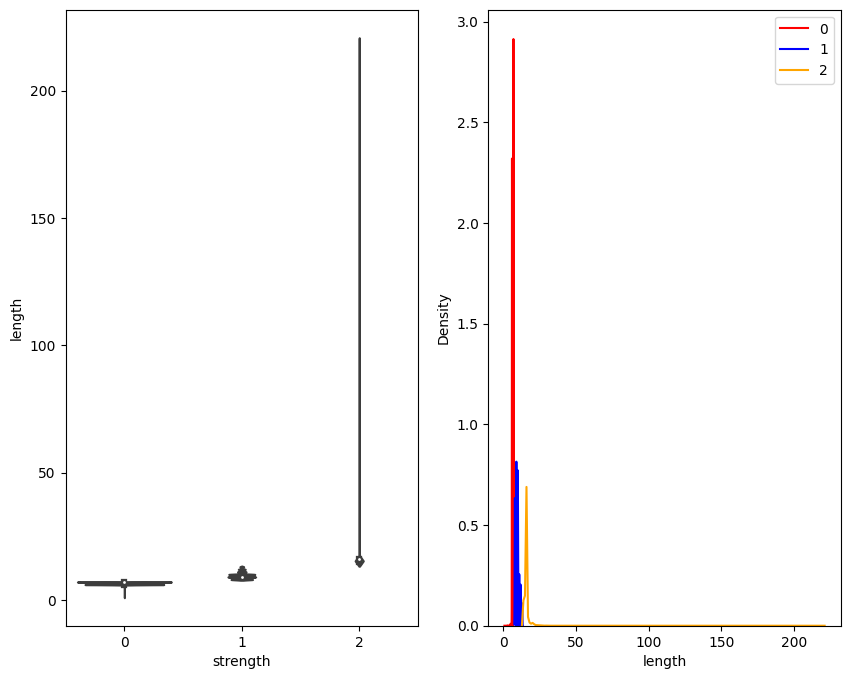

In [87]:
get_dist(data , "length")

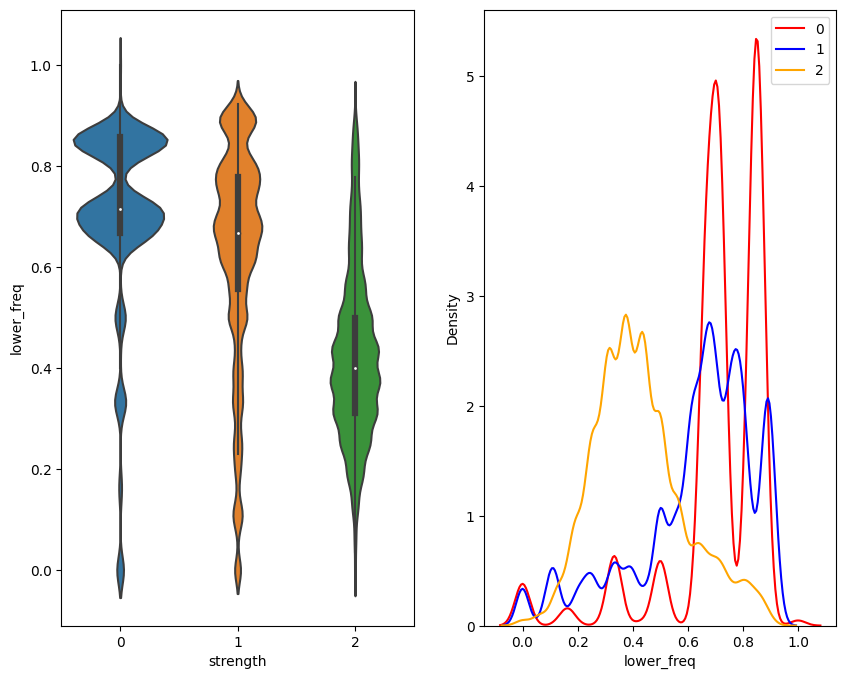

In [89]:
get_dist(data , 'lower_freq')

In [90]:
### we have some kind of overlappping region in distribution plot 
### when class is 2 , we have less value of 'lower_freq' than class 1 & class 0

## it means 'lower_freq' is a interesting feature upto some extent as have some overlapping region

## similarly from violinplot ,we will say on account of such overlappping , 
## when class is 2 we have less value of 'lower_freq' than class 1 & class 0
## this feature 'lower_freq' is a interesting feature upto some extent in determining the strength